This file is for the first paper, and it's using the model_first_paper.py for the agents

The reporters won't store the agents' position

In [1]:
from model_first_paper import *
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\leona\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\leona\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\Users\leona\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
map_width = 50
map_height = 50
moore = False

#Number of commuters, taxis, and noises
num_of_motorist = [30,25,10]

#With inventory
inv_size = 12
cp_size = int(np.ceil(inv_size/3))

#Without inventory
#cp_size = 10

model = switching_model(num_of_motorist,num_of_stations=4,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="random")

4


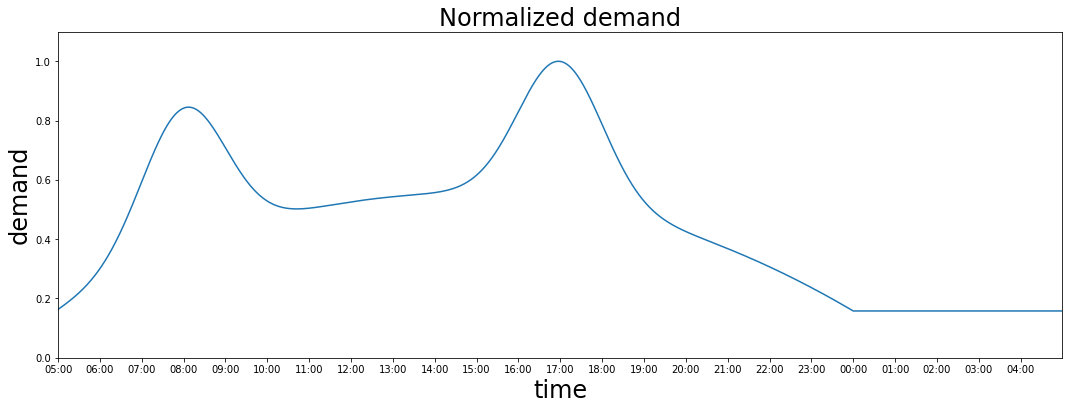

In [42]:
model.draw_prob_des()

In [3]:
#run model
#Dalam menit
days = 14
num_of_step = days*24*60
#num_of_step = 100
for i in range(num_of_step):
    model.step()

In [4]:
#Ambil data agent
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data.head()

Charge Alive
Step AgentID                   
0    0        1051.142204  None
     1        1214.482273  None
     2        2160.024140  None
     3        1050.359005  None
     4        2188.351174  None

In [69]:
id_commuter = []
id_taxi = []
id_noise = []
for mot in model.motorists:
    if mot.status == "commuter":
        id_commuter.append(mot.unique_id)
    elif mot.status == "taxi":
        id_taxi.append(mot.unique_id)
    elif mot.status == "noise":
        id_noise.append(mot.unique_id)

print(id_commuter)
print(id_taxi)
print(id_noise)

[129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158]
[159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183]
[184, 185, 186, 187, 188, 189, 190, 191, 192, 193]


In [68]:
temp = agent_data.loc[(20159)]
temp = temp[(temp['Alive'] == True) | (temp['Alive'] == False)]
temp.reset_index( drop = True, inplace =True )
temp_ = ['commuter', 'taxis', 'noise']
type_ = []
for i in range(len(num_of_motorist)):
    for j in range(num_of_motorist[i]):
        type_.append(temp_[i])
temp['type'] = type_
final = temp[temp['Alive'] == True]
final.type.value_counts()
#temp

,Charge,Alive
AgentID,,
129,NaN,True
130,NaN,True
131,NaN,True
132,NaN,True
133,NaN,True
...,...,...
189,NaN,True
190,NaN,True
191,NaN,True


In [56]:
num_of_motorist[i]

30

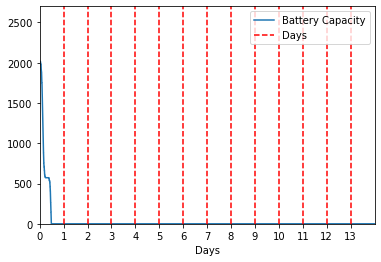

In [5]:
#Cek baterai
battery_id = 8
battery_energy = agent_data.xs(battery_id, level = "AgentID")["Charge"]
battery_energy.plot()
plt.xlim(0,num_of_step)
plt.ylim(0,2700)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Battery Capacity','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Example of Battery Charge Cycle')
plt.show()

In [10]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data.tail()

,num_of_alive,num_of_charging
20155,42,9
20156,42,9
20157,42,9
20158,42,9
20159,42,9


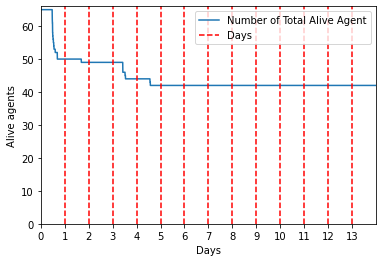

In [7]:
plt.plot(model_data["num_of_alive"])
plt.ylim([0,sum(num_of_motorist) + 1])
plt.ylabel("Alive agents")
plt.xlabel("Steps")
plt.xlim(0,num_of_step)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Number of Total Alive Agent','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Number of Total Alive Agent')
plt.show()

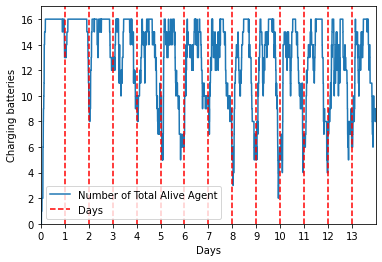

In [8]:
plt.plot(model_data["num_of_charging"])
plt.ylim([0,model.num_of_stations*model.cp_size +1])
plt.ylabel("Charging batteries")
plt.xlabel("Steps")
plt.xlim(0,num_of_step)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Number of Total Alive Agent','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Number of Total Alive Agent')
plt.show()

In [9]:
#Cek kategori motorist yang hidup
commuter_alive = 0
taxi_alive = 0
noise_alive = 0

for mot in model.motorists:
    if mot.alive:
        if mot.status == "commuter":
            commuter_alive +=1
        elif mot.status == "taxi":
            taxi_alive +=1
        elif mot.status == "noise":
            noise_alive += 1

print("Jumlah pemotor yang hidup masing-masing sebagai berikut:")
print('Commuter: ' + str(commuter_alive))
print('Taxi: ' + str(taxi_alive))
print('Noise: ' + str(noise_alive))

Jumlah pemotor yang hidup masing-masing sebagai berikut:
Commuter: 25
Taxi: 10
Noise: 7
